# Introduction


In today’s digitalisation world payment through digital platforms has been increasing day by day. In this era, one of the frequent payment methods is through credit card. But, approval of credit card is crucial in today's world to enable efficient and responsible financial decisions. It helps banks and financial institutions assess applicants' creditworthiness, minimize default risks and prevent fraudulent activities. A good client for credit card approval is highly valuable for a bank as it minimizes potential risks and maximizes profitability. By identifying creditworthy applicants, the bank can reduce the likelihood of defaults and delinquencies, leading to lower credit losses and higher repayment rates.

Credit card approval prediction will revolutionize the banking sector. It'll lead to reduced default risks, increased customer satisfaction, and efficient resource allocation. Banks can offer tailored credit products, boost profitability and maintain a stable financial ecosystem by making data-driven decisions.

Making a decision about which features should be given priority is undoubtedly tough. In such cases, Machine learning algorithm will be highly beneficial for any bank in India in the future. It will streamline and automate the application process, improve accuracy in assessing creditworthiness, reduce defaults and enhance customer experience. Data-driven decisions will enable banks to offer competitive products, expand their customer base and ensure a more stable and profitable operation.

The aim of this project is to conduct extensive data analysis and the implement various machine learning techniques in Python in order to create the best model with the most important features in terms of both business value and realistic features.



##Columns :
* **Ind_ID:** Client ID
* **Gender:** Information of Gender
* **Car_owner:** Client having car or not
* **Propert_owner:** Client having property or not
* **Children:** Number of childern
* **Annual_income:** Annual income
* **Type_Income:** Income type
* **Education:** Education level
* **Marital_status:** Marital_status
* **Housing_type:** Living style
* **Birthday_count:** Age of a person in days (0 means current day, -1 means yesterday and so on).
* **Employed_days:** Start date of employment. current day (0). Positive value means, individual is currently unemployed.
* **Mobile_phone:** Any mobile phone
* **Work_phone:** Any work phone
* **Phone:** Any phone number
* **EMAIL_ID:** Any email ID
* **Type_Occupation:** Occupation Type
* **Family_Members:** Family member size

## Importing required libraries

In [ ]:
# Importing required libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading and Getting a Glimpse of the Dataset

The dataset available is in .csv format, so I will load the dataset in csv format to start data analysis.

In [ ]:
# Importing required files
Credit_card = pd.read_csv('Credit_card.csv')
Credit_label = pd.read_csv('Credit_card_label.csv')

In [ ]:
# Merging two tables to get desired info in one table
CC_Data = pd.merge(Credit_card, Credit_label, how = 'left', on = 'Ind_ID')

In [ ]:
CC = CC_Data.copy()  # Creating a new copy
CC.shape

(1548, 19)

In [ ]:
CC.head()      # exploring first five variables to identify anamolies in the data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


As you can see there are some NaN values in few columns which need to be replaced.

In [ ]:
# renaming some features to make it more readable feature names
CC = CC.rename(columns={
    'Ind_ID':'ID',
    'GENDER':'Gender',
    'Propert_Owner':'Property_Owner',
    'CHILDREN':'Children_count',
    'EDUCATION':'Education_level',
    'EMAIL_ID': 'Email_id',
    'Birthday_count': 'Age'

    })

In [ ]:
CC.head()     # exploring first five variables to check renaming of features

,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
CC.info()            # Checking the data types of each feature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   Children_count   1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education_level  1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
CC.describe(include='all')     # To check description of all features

,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [ ]:
# checking total number of missing values in each feature
CC.isnull().sum().sort_values(ascending= False)

Type_Occupation    488
Annual_income       23
Age                 22
Gender               7
ID                   0
Employed_days        0
Family_Members       0
Email_id             0
Phone                0
Work_Phone           0
Mobile_phone         0
Housing_type         0
Marital_status       0
Education_level      0
Type_Income          0
Children_count       0
Property_Owner       0
Car_Owner            0
label                0
dtype: int64

There are Missing values in Type_Occupation, Annual_income, Age and Gender Columns.

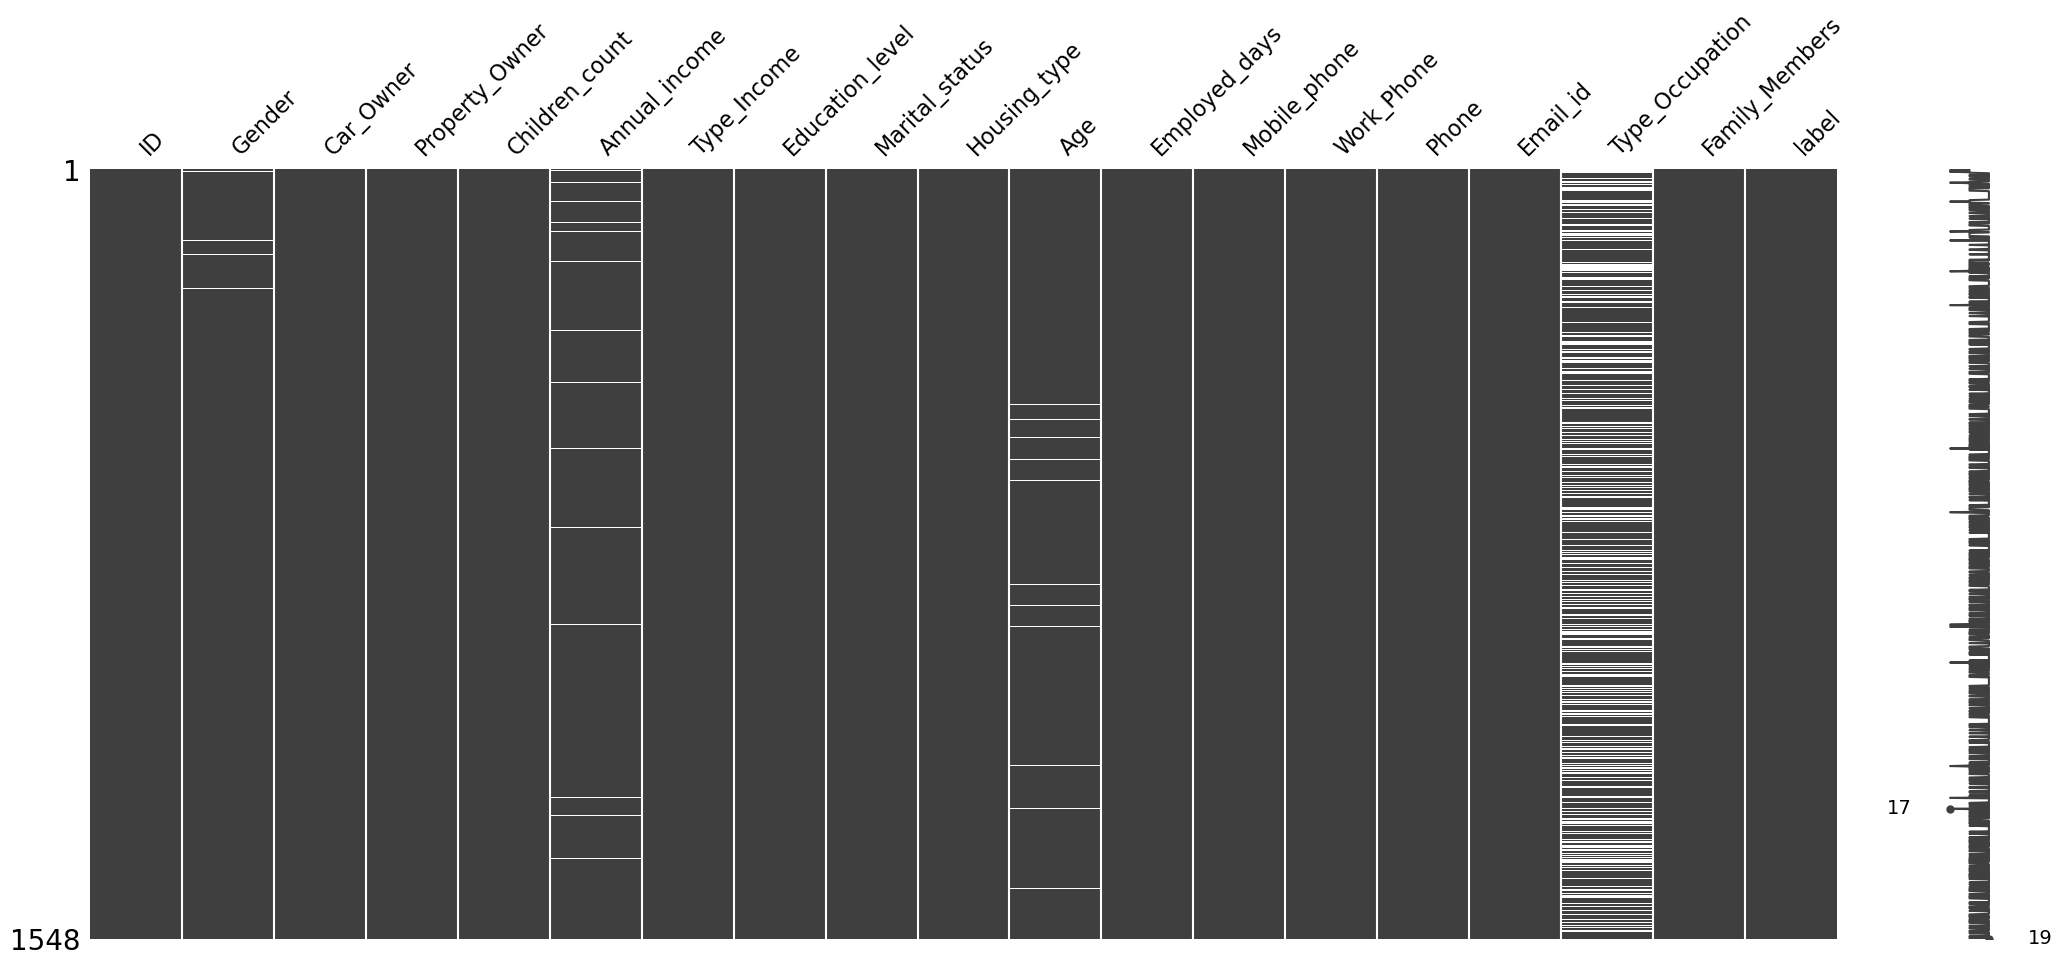

In [ ]:
# visualization of missing values
import missingno as msno     # importing required library for missing value
msno.matrix(CC)
plt.show()

1. Type_Occupation columns having more missing values.
2. Gender, Annual_income and Age having less missing values.

In [ ]:
CC['Gender'].mode()

0    F
Name: Gender, dtype: object

* Replacing Missing value of Gender with Mode
* Since, Type_Occupation column having more than 30% missing values. Those will be replace with  Missing to maintain the Data Integrity.

In [ ]:
# Replacing categorical missing data

CC['Gender'].fillna('F', inplace = True)
CC['Type_Occupation'].fillna('Missing', inplace = True)

In [ ]:
CC.head()

,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,Missing,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Missing,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,Missing,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Missing,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Missing,2,1


## Exploratory Data Analysis

### Univariate Analysis of each feature

In [ ]:
CC['Gender'].value_counts()

F    980
M    568
Name: Gender, dtype: int64

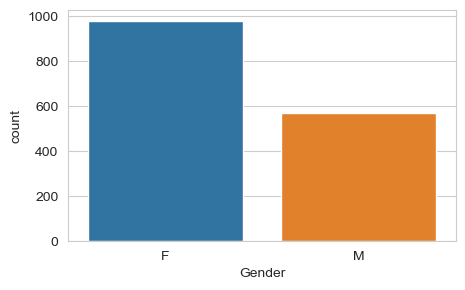

In [ ]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(data = CC, x= 'Gender', width = 0.8, order = CC['Gender'].value_counts(ascending=False).index)
plt.show()

* Female applicants are more than Male.

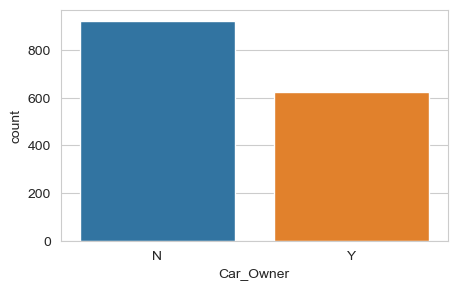

In [ ]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(data = CC, x= 'Car_Owner', width = 0.8, order = CC['Car_Owner'].value_counts(ascending=False).index)
plt.show()

* Most of the applicants don't own a car.

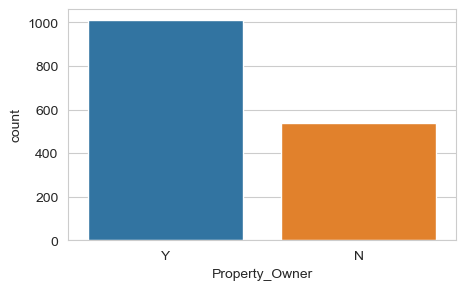

In [ ]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(data = CC, x= 'Property_Owner')
plt.show()

* Most of the applicants own a property.

In [ ]:
CC['Children_count'].value_counts()

0     1091
1      305
2      134
3       16
4        1
14       1
Name: Children_count, dtype: int64

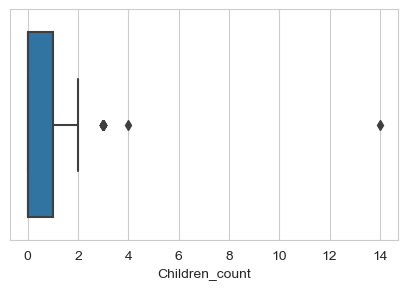

In [ ]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.boxplot(CC, x= 'Children_count')
plt.show()

* There are some outliers present in which 14 Value is the extreme count.

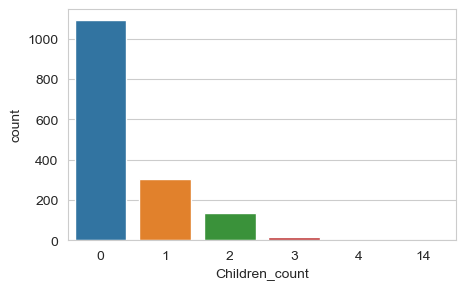

In [ ]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(CC, x='Children_count')
plt.show()

* From above plots it is clear that most of the people don't have a child.

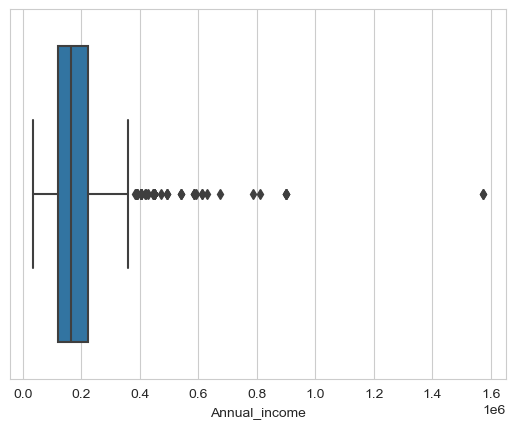

In [ ]:
sns.boxplot(CC, x = 'Annual_income')
plt.show()

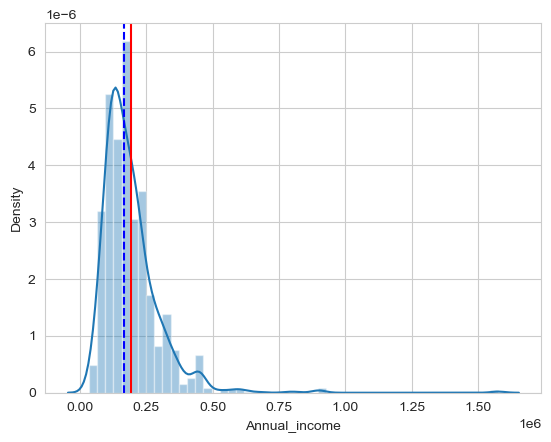

In [ ]:
sns.distplot(CC['Annual_income'])
plt.axvline(CC['Annual_income'].mean(), color = 'red', label = 'Mean')
plt.axvline(CC['Annual_income'].median(), color = 'blue', ls = '--', label = 'Median')
plt.show()

In [ ]:
CC['Annual_income'].skew()

3.9245642452364167

* Annual income having lots of outliers.
* The value of skewness is 3.92 which indicates that it is highly right skewed data.

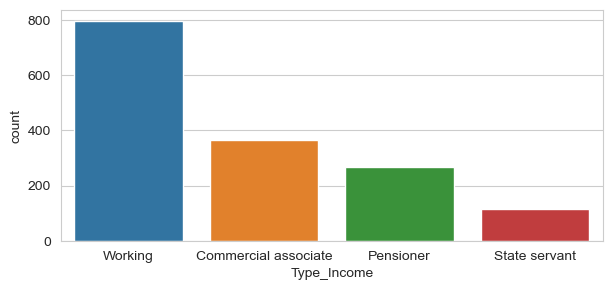

In [ ]:
plt.figure(figsize=(7,3))
sns.set_style('whitegrid')
sns.countplot(data = CC, x= 'Type_Income',order = CC['Type_Income'].value_counts(ascending=False).index)
plt.show()

* Most of applicants are working

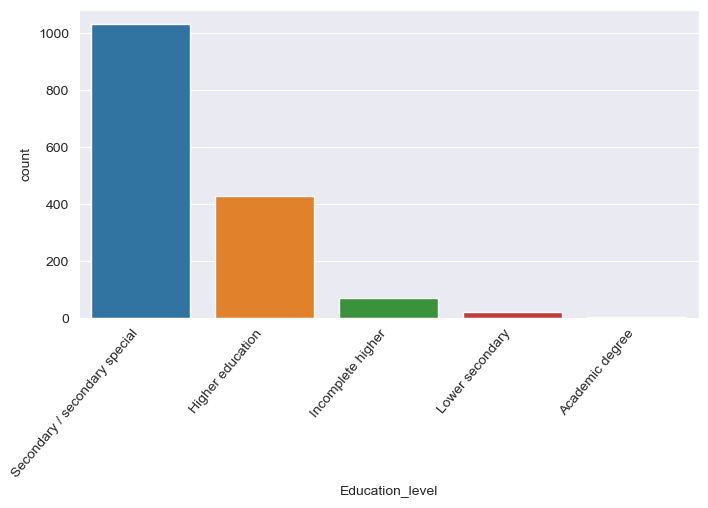

In [ ]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
ax = sns.countplot(data = CC, x= 'Education_level',order = CC['Education_level'].value_counts(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

* Most of the applicants have completed Secondary/ Secondary special.

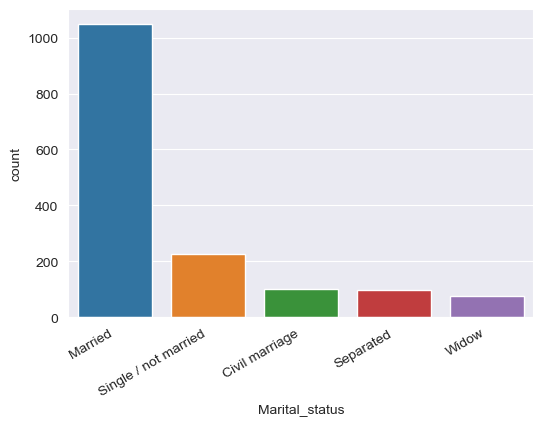

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(CC, x='Marital_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

* Most of the applicants are married and having no child.

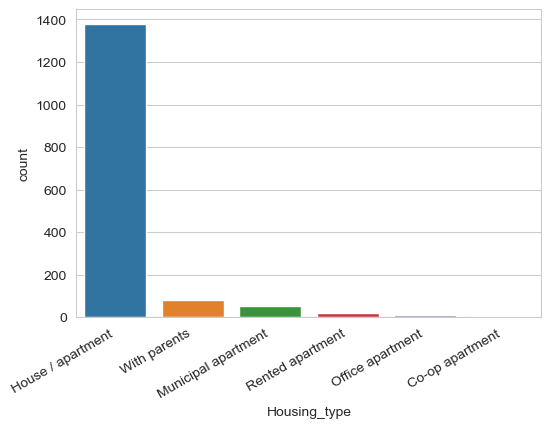

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style('whitegrid')
ax = sns.countplot(CC, x='Housing_type', order = CC['Housing_type'].value_counts(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

* Almost every applicant is living in House/Aprtment.

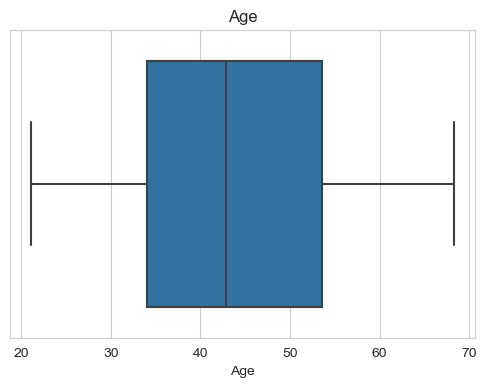

In [ ]:
plt.figure(figsize=(6,4))
Age = CC['Age']/-365.25
sns.boxplot(CC, x= Age)
plt.title(label = 'Age')
plt.show()

* No outliers present in Age Column.

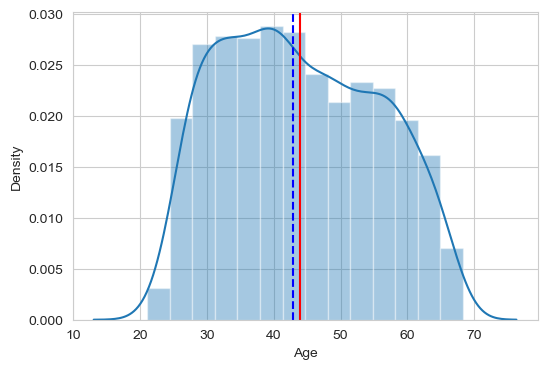

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(Age)
plt.axvline(Age.mean(), color = 'red', label = 'Mean')
plt.axvline(Age.median(), color = 'blue', ls = '--', label = 'Median')
plt.show()

In [ ]:
print(Age.min())
print(Age.max())
print(Age.mean())
print(Age.mean())
print(Age.skew())

21.09514031485284
68.2984257357974
43.91606316433474
43.91606316433474
0.17108666821145133


* The youngest applicant is 21 years old while the oldest is 68 years old with the average of 43.91 and median of 42.6
* Since, the skewness is between -0.5 & 0.5, the data is nearly symmetrical.


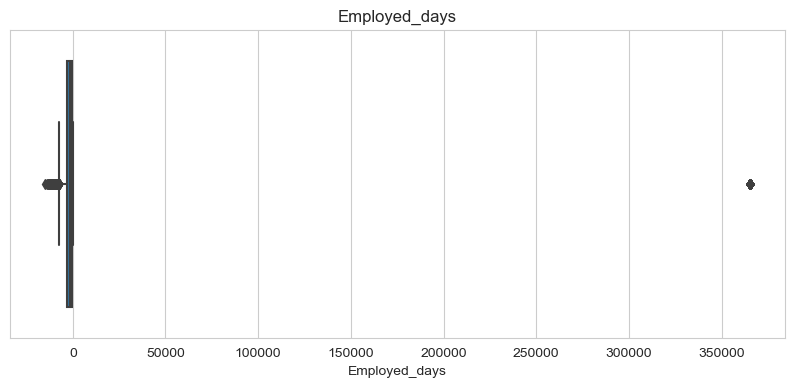

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(CC, x=CC['Employed_days'])
plt.title(label = 'Employed_days')
plt.show()

* Employed Days contain one outlier which is more than 350000 days.

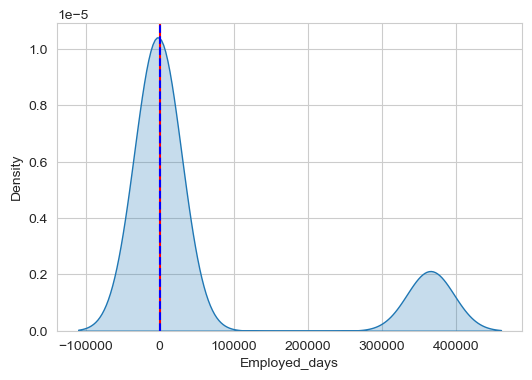

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(CC['Employed_days'], fill = True)
plt.axvline(Age.mean(), color = 'red', label = 'Mean')
plt.axvline(Age.median(), color = 'blue', ls = '--', label = 'Median')
plt.show()

In [ ]:
CC['Mobile_phone'].value_counts()

1    1548
Name: Mobile_phone, dtype: int64

All applicants having a Mobile phone

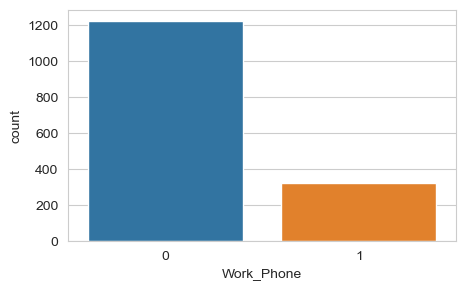

In [ ]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(CC, x='Work_Phone')
plt.show()

* Most of the applicants don't have a Work Phone.

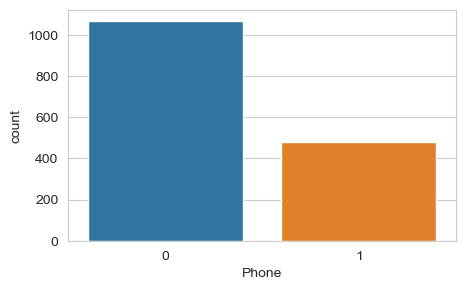

In [ ]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(CC, x='Phone')
plt.show()

* Most of applicants don't have a phone.

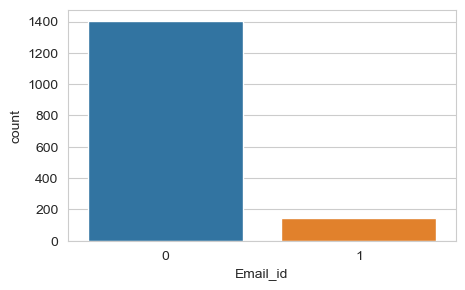

In [ ]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(CC, x='Email_id')
plt.show()

* More applicants don't have an Email ID.

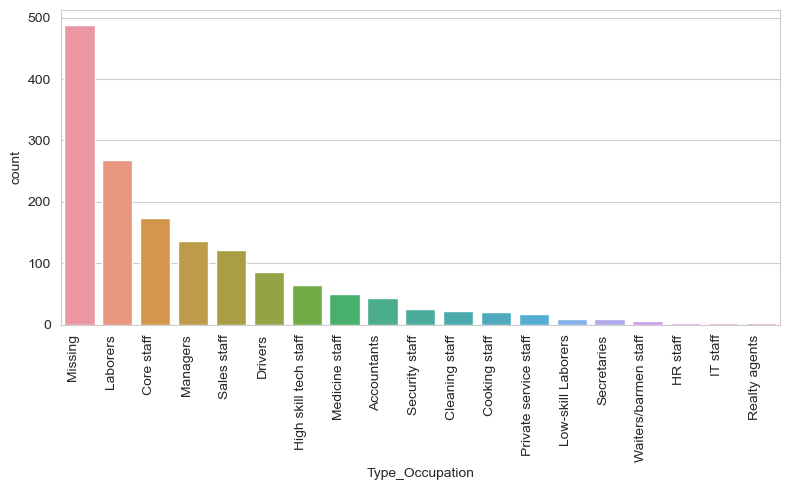

In [ ]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
ax = sns.countplot(CC, x='Type_Occupation',order = CC['Type_Occupation'].value_counts(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

* It has lots of missing values.
* Laborers are the most for credit card application.

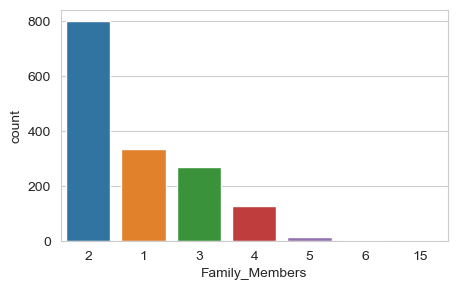

In [ ]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(CC, x='Family_Members',order = CC['Family_Members'].value_counts(ascending=False).index)
plt.show()

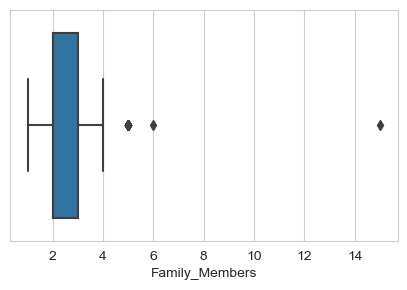

In [ ]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.boxplot(CC, x='Family_Members')
plt.show()

* Most applicants are two in their household, this is also confirmed with the fact that most don’t have a child.
* We also have outliers, 1 of them is extreme with 15 members in their household.

## Bivariate and Multivariate analysis

### Creating scatter charts between the pair of variables to understand the Numerical to Numerical relationships.

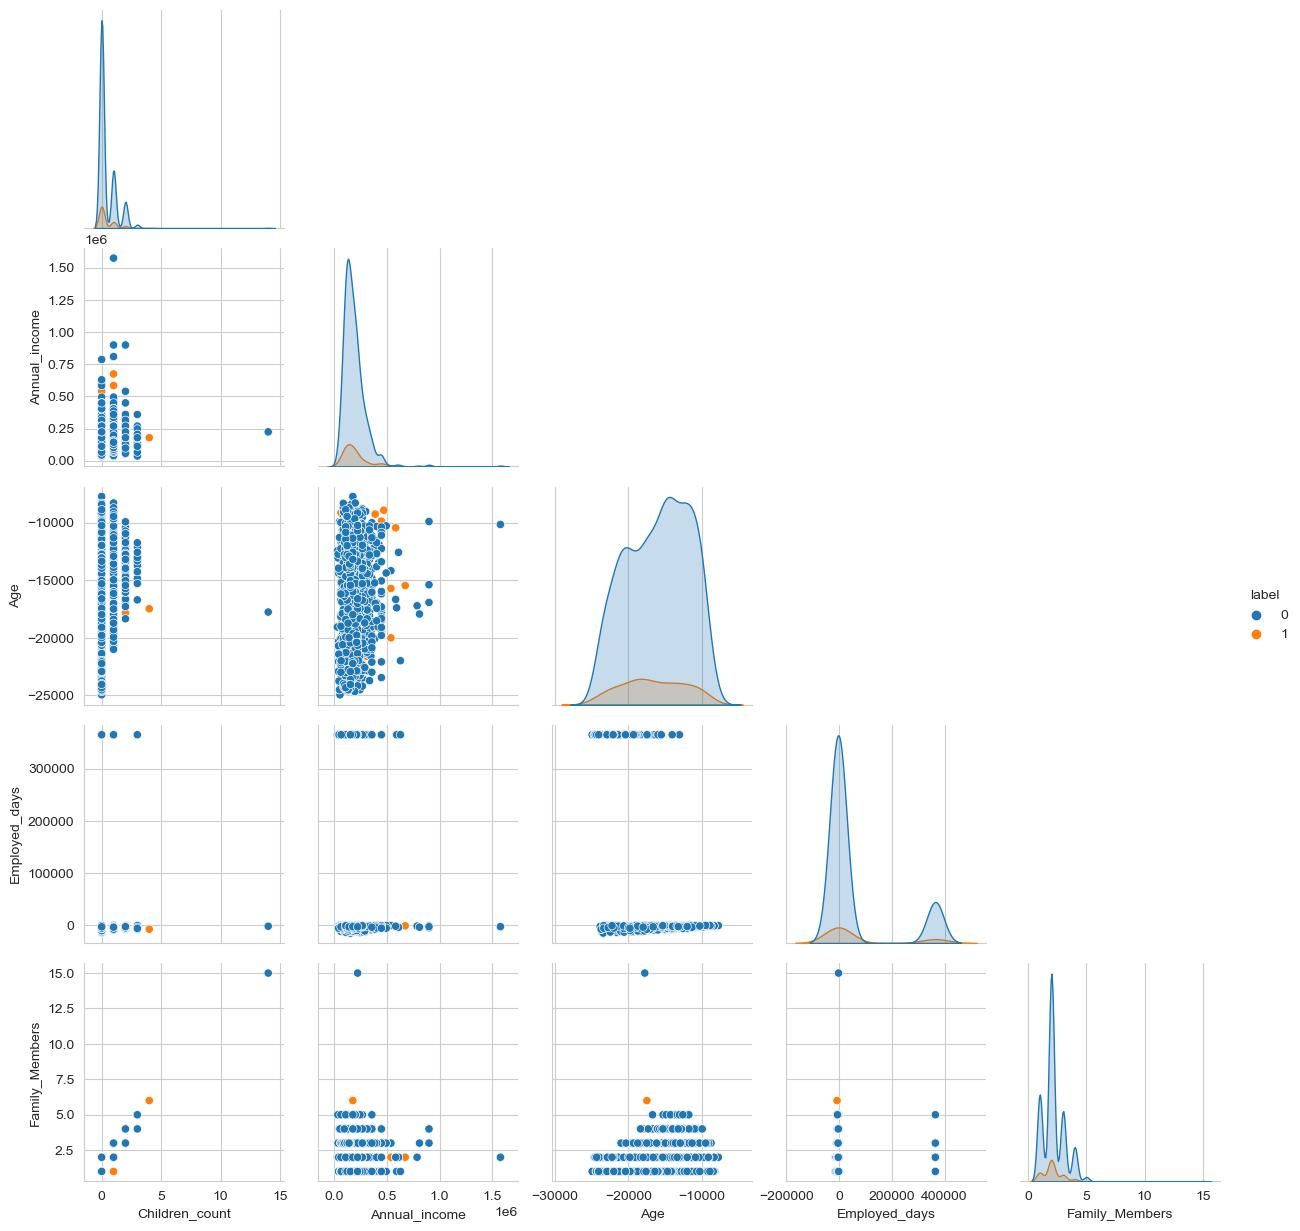

In [ ]:
col = CC.drop(['ID','Gender','Car_Owner','Property_Owner','Type_Income','Education_level','Marital_status','Housing_type','Mobile_phone',
               'Work_Phone','Phone','Email_id','Type_Occupation'],axis = 1)
sns.pairplot(col, hue = 'label' ,corner=True)
plt.show()


* There is positive correlation between Famliy_Members and Children_count.This makes sense, the more the children someone have, the larger will be the family member count.

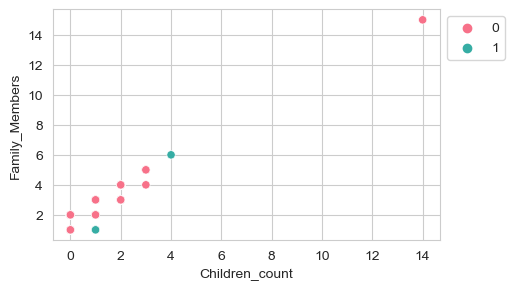

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = 'Children_count', y='Family_Members', hue='label', data=CC, palette = 'husl' )
plt.legend(bbox_to_anchor=(1,1))
plt.show()

* The more children a person has larger will be the family member count.

In [ ]:
# Calculating the correlation between columns.
col_no_Mobile = CC.drop(['Mobile_phone','label'],axis = 1)
col_no_Mobile.corr()

,ID,Children_count,Annual_income,Age,Employed_days,Work_Phone,Phone,Email_id,Family_Members
ID,1.000000,0.032535,0.030147,0.022909,-0.055396,0.085794,0.008403,-0.037923,0.016950
Children_count,0.032535,1.000000,0.078497,0.279716,-0.219095,0.035014,-0.004908,0.025776,0.890248
Annual_income,0.030147,0.078497,1.000000,0.111638,-0.160175,-0.071171,-0.006439,0.122320,0.050957
Age,0.022909,0.279716,0.111638,1.000000,-0.619039,0.174687,-0.029215,0.166749,0.266527
Employed_days,-0.055396,-0.219095,-0.160175,-0.619039,1.000000,-0.231184,-0.003403,-0.118268,-0.238705
Work_Phone,0.085794,0.035014,-0.071171,0.174687,-0.231184,1.000000,0.352439,-0.009594,0.072228
Phone,0.008403,-0.004908,-0.006439,-0.029215,-0.003403,0.352439,1.000000,0.018105,0.005372
Email_id,-0.037923,0.025776,0.122320,0.166749,-0.118268,-0.009594,0.018105,1.000000,0.035098
Family_Members,0.016950,0.890248,0.050957,0.266527,-0.238705,0.072228,0.005372,0.035098,1.000000


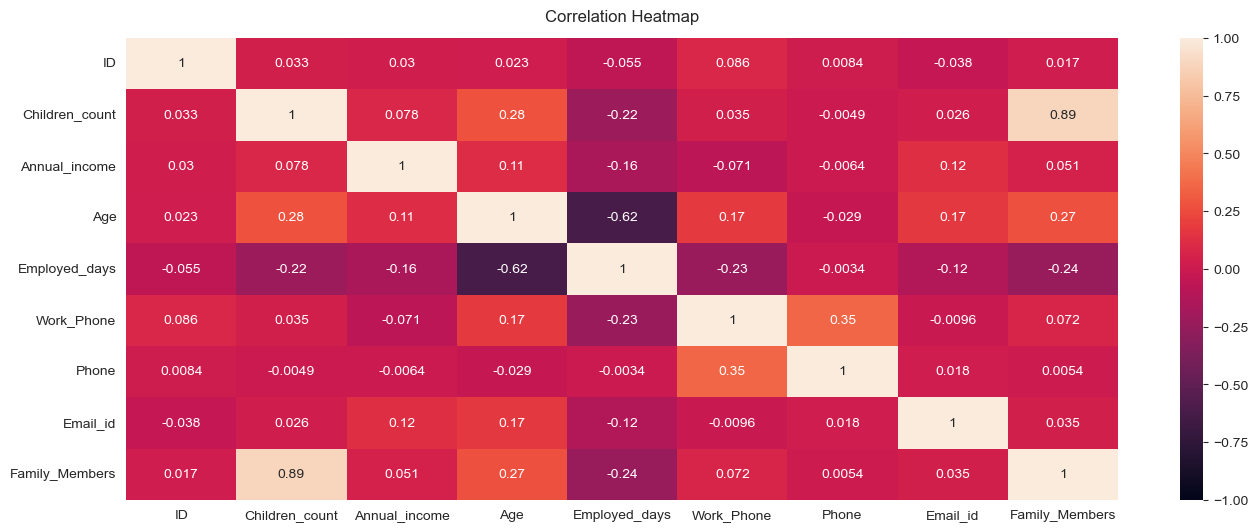

In [ ]:
# Calculating the correlation between columns with the help of heatmap for better understanding.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(col_no_Mobile.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

* Family members count is highly correlated with children count.
* Phone having a positive correlation with Work Phone.
* Age has some positive correlation with the family member count and children count.
* The older a person is, the most likely he/she will have a larger family.
* Also there is negative correlation between Age and Employed days.

### Creating Boxplot for analysis of Numerical vs categorical features

**Age vs the rest of categorical features**

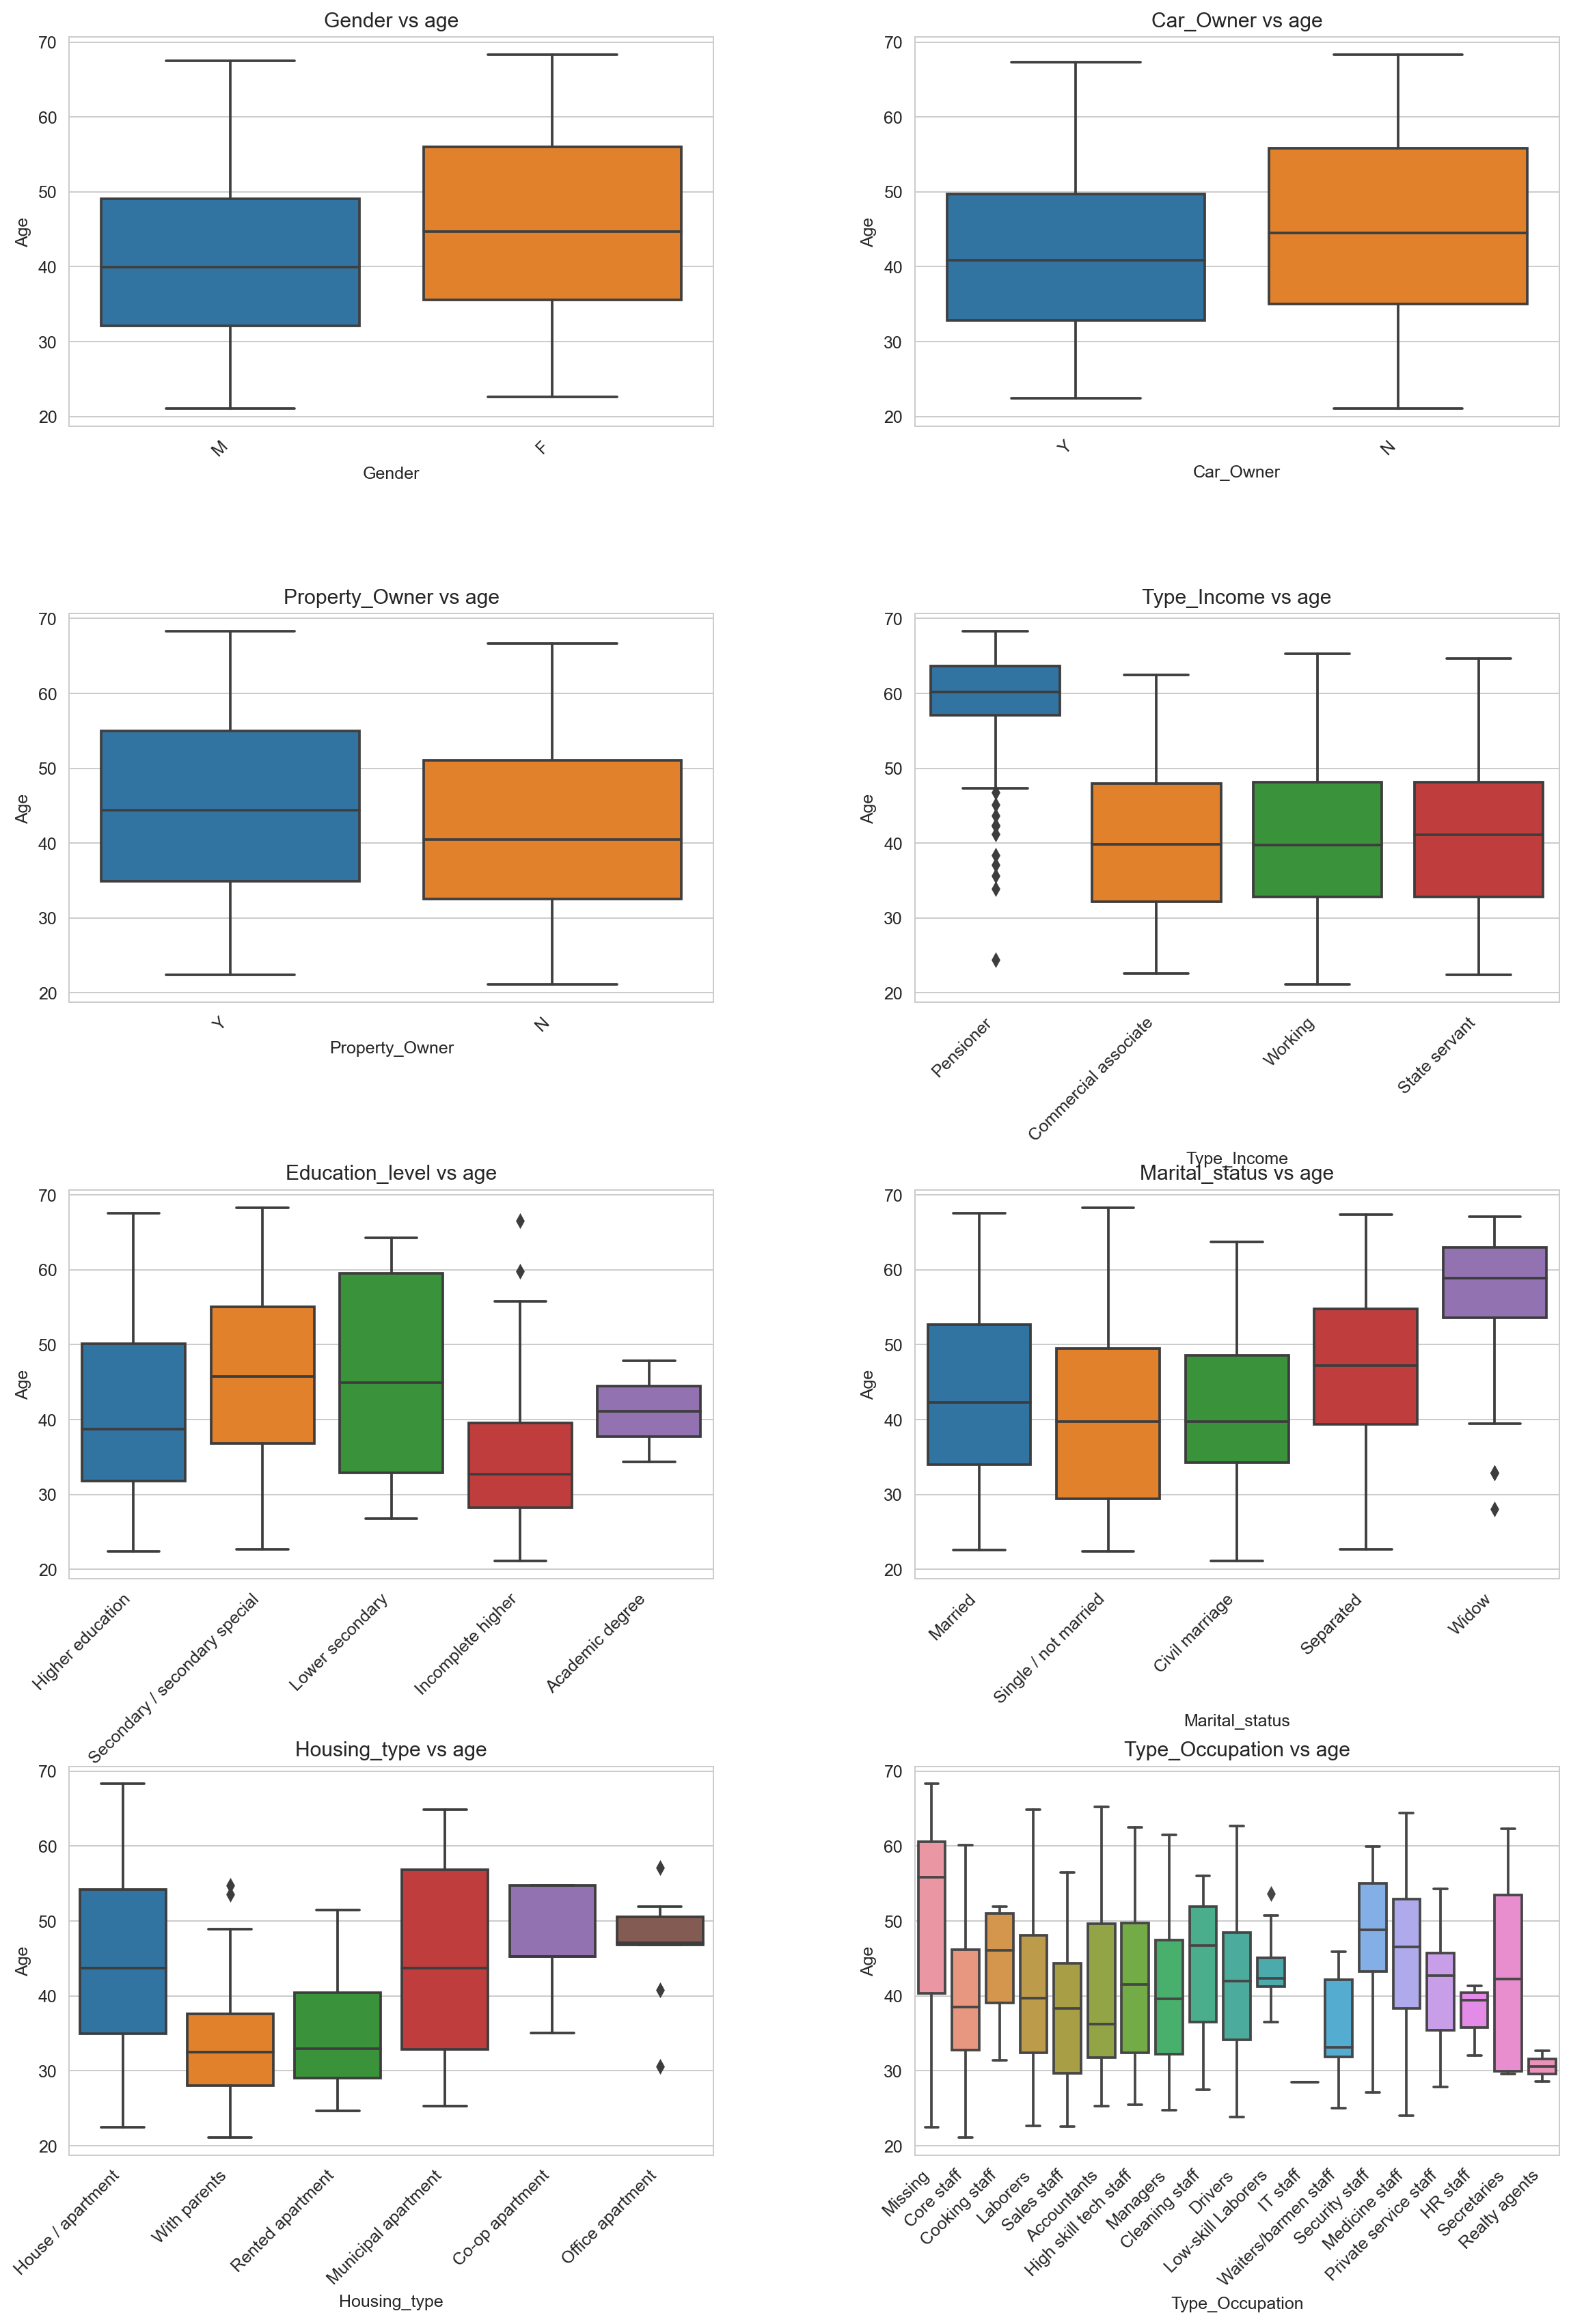

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=9.0)
cat_features = ['Gender', 'Car_Owner', 'Property_Owner', 'Type_Income', 'Education_level', 'Marital_status', 'Housing_type', 'Type_Occupation']
for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=CC[cat_features[cat_ft_count]],y=np.abs(CC['Age'])/365.25)
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs age")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Age')
            cat_ft_count += 1
    break

* Female applicants are older than Male.
* Most of older people don't own a car.
* It is clear that those who own a property are generally older than those who don't.
* Pensioners, of course, are older than those who are working (But,there are some outliers).
* Incomplete higher tend to be younger and secondary special tend to older.
* Widows tend to be much older, although there are some in their 30s.
* As expected, those living with their parents are usually younger, although exceptions exist.
* Missing values tends to older which need to be imputed. Apart from that, those who work as security staff are usually older, while those in IT tend to be younger.


**Annual Income vs the rest of categorical features**

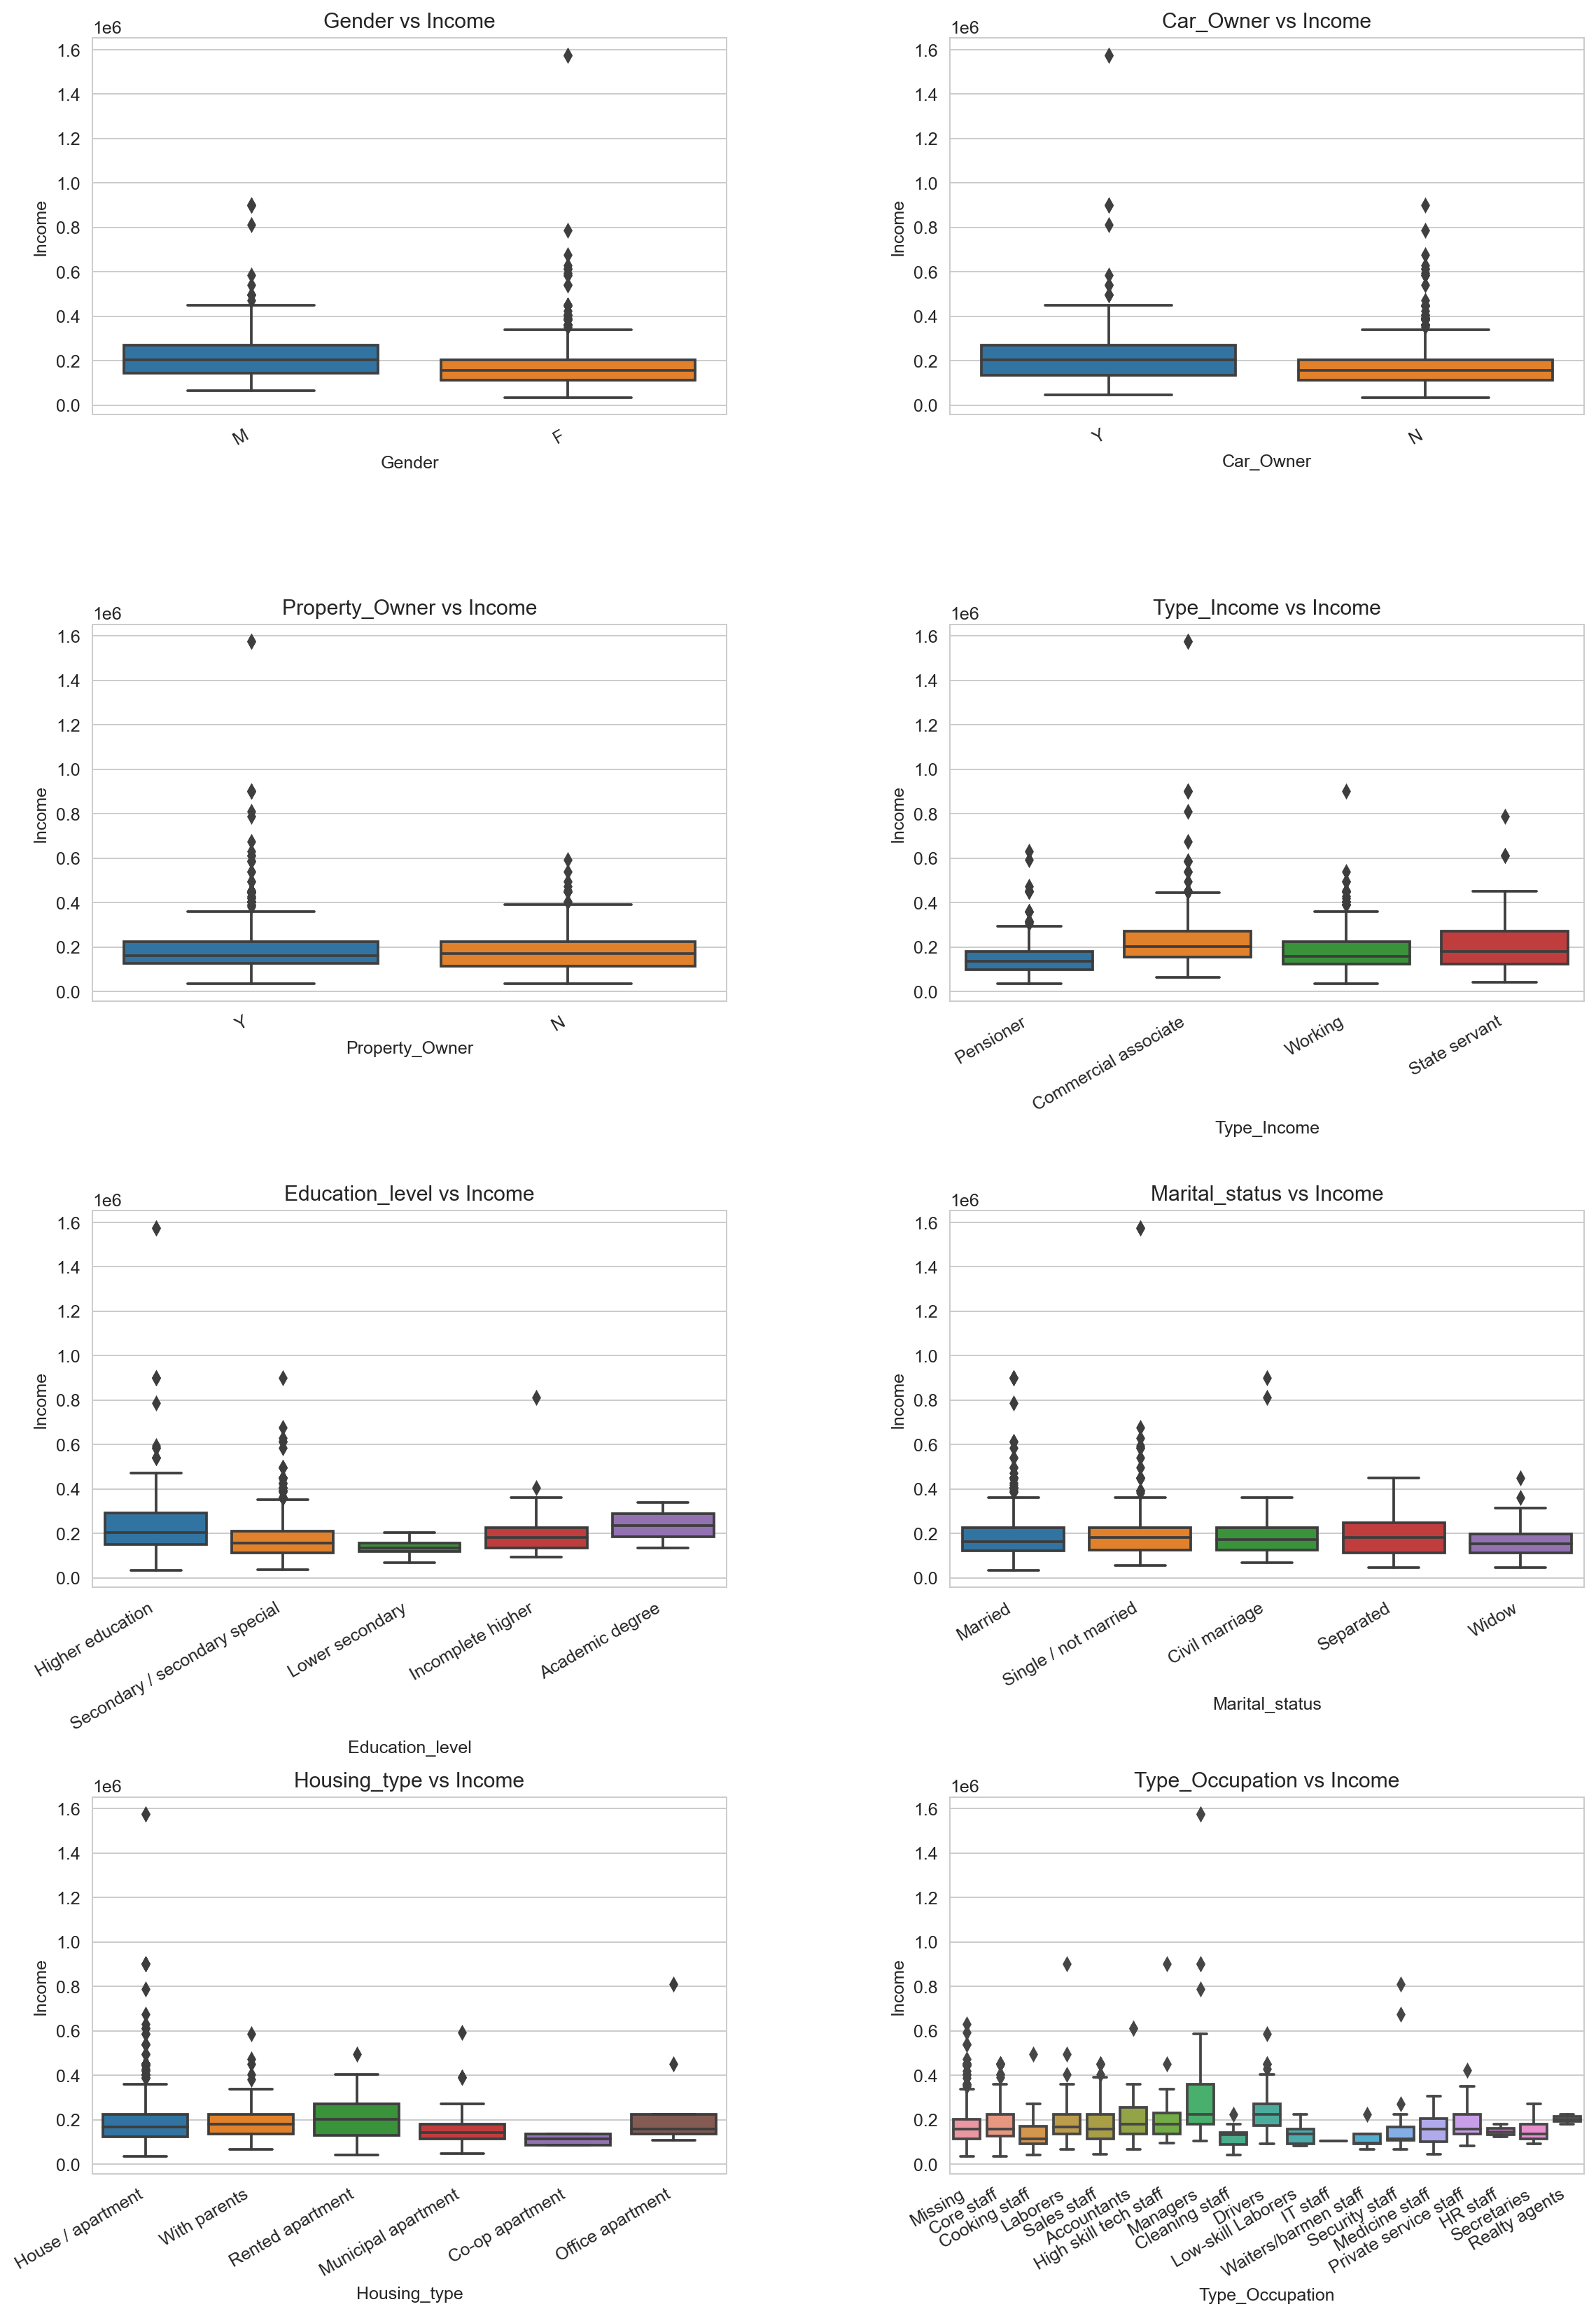

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=10.0)

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=CC[cat_features[cat_ft_count]],y=np.abs(CC['Annual_income']))
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs Income")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=30,ha='right')
            plt.ylabel('Income')
            cat_ft_count += 1
    break

* Male people having more income.
* People who own car tends to have more income.
* Commerical people having a more income.
* People who completed academic degree earning more income.
* More earning people tend to live in rented aprtament. More likely due to job location which is away from own house.
* Manager designation people earning more income.

### Analysis of Categorical vs Categorical features



**HO:** The feature categories have no effect on the target variable.

**H1:** One or more of the feature categories has a significant effect on the target variable.

In [ ]:
from scipy import stats

In [ ]:
def chi_func(feature):

    # selection of row with rejected label
    rejected_ft= CC[CC['label'] == 1][feature]
    rejected_ft_ct = pd.crosstab(index=rejected_ft, columns=['Count']).rename_axis(None, axis=1)

    # drop the index feature name
    rejected_ft_ct.index.name = None

    # calculating observe values
    obs = rejected_ft_ct
    print('Observed values:\n')
    print(obs)
    print('\n')

    # expected values
    print(obs.index)
    exp = pd.DataFrame([obs['Count'].sum()/len(obs)] * len(obs.index),columns=['Count'], index=obs.index)
    print('Expected values:\n')
    print(exp)
    print('\n')

    # chi-square test
    chi_squared_stat = (((obs-exp)**2)/exp).sum()
    print('Chi-square:\n')
    print(chi_squared_stat[0])
    print('\n')

    # p-value
    p_value = 1 - stats.chi2.cdf(x = chi_squared_stat, df = len(obs) - 1)
    print('P-value:\n')
    print(p_value)
    print('\n')


    if p_value <= 0.05:
        print('Reject H0: Feature categories has a significant effect on the target variable.')
    else:
        print('Retain H0: Feature categories have no effect on the target variable.')

In [ ]:
for ft in cat_features:
    print('\n\n**** {} ****\n'.format(ft))
    chi_func(ft)



**** Gender ****

Observed values:

   Count
F    100
M     75


Index(['F', 'M'], dtype='object')
Expected values:

   Count
F   87.5
M   87.5


Chi-square:

3.5714285714285716


P-value:

[0.05878172]


Retain H0: Feature categories have no effect on the target variable.


**** Car_Owner ****

Observed values:

   Count
N    108
Y     67


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N   87.5
Y   87.5


Chi-square:

9.605714285714285


P-value:

[0.00193973]


Reject H0: Feature categories has a significant effect on the target variable.


**** Property_Owner ****

Observed values:

   Count
N     65
Y    110


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N   87.5
Y   87.5


Chi-square:

11.571428571428571


P-value:

[0.00066973]


Reject H0: Feature categories has a significant effect on the target variable.


**** Type_Income ****

Observed values:

                      Count
Commercial associate     50
Pensioner                42
State servant  

* Gender has no effect on target variable.
* All other categorical variables has a significant effect on the target variable.

# Data Cleaning

### Encoding of Categorical Variables

In [ ]:
# To avoid data leakage from outcome variable splitting the data set
#Extracting Independent and dependent Variable

X = CC.iloc[:,:-1]
y = CC.iloc[:,-1]

In [ ]:
X['Education_level'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [ ]:
# Ordinal encoding for Education_level
from sklearn.preprocessing import OrdinalEncoder
EL_dict = {'Lower secondary':1,
            'Secondary / secondary special':2,
            'Incomplete higher':3,
            'Higher education':4,
            'Academic degree':5}

X['Education_level'] = X['Education_level'].map(EL_dict)

In [ ]:
# label encoding for rest categorical variable

from sklearn.preprocessing import LabelEncoder

cat_col = ['Gender', 'Car_Owner', 'Property_Owner', 'Type_Income', 'Marital_status', 'Housing_type', 'Type_Occupation']

for col in cat_col:
    X[col] = LabelEncoder().fit_transform(X[col])

### Dealing With Missing Values
For missing values I am using KNN imputation technique.

In [ ]:
from fancyimpute import KNN
knn_imputer = KNN() # calling KNN function
X_knn = X.copy(deep=True) # creating copy
X_knn.iloc[:, :] = knn_imputer.fit_transform(X_knn)

Imputing row 1/1548 with 0 missing, elapsed time: 0.801
Imputing row 101/1548 with 0 missing, elapsed time: 0.801
Imputing row 201/1548 with 0 missing, elapsed time: 0.801
Imputing row 301/1548 with 0 missing, elapsed time: 0.801
Imputing row 401/1548 with 0 missing, elapsed time: 0.801
Imputing row 501/1548 with 0 missing, elapsed time: 0.801
Imputing row 601/1548 with 0 missing, elapsed time: 0.817
Imputing row 701/1548 with 0 missing, elapsed time: 0.817
Imputing row 801/1548 with 0 missing, elapsed time: 0.817
Imputing row 901/1548 with 0 missing, elapsed time: 0.817
Imputing row 1001/1548 with 0 missing, elapsed time: 0.817
Imputing row 1101/1548 with 0 missing, elapsed time: 0.817
Imputing row 1201/1548 with 0 missing, elapsed time: 0.817
Imputing row 1301/1548 with 0 missing, elapsed time: 0.817
Imputing row 1401/1548 with 0 missing, elapsed time: 0.817
Imputing row 1501/1548 with 0 missing, elapsed time: 0.817


In [ ]:
X_knn.head()

,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members
0,5008827.0,1.0,1.0,1.0,0.0,180000.000000,1.0,4.0,1.0,1.0,-18772.000000,365243.0,1.0,0.0,0.0,0.0,12.0,2.0
1,5009744.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0
2,5009746.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13556.999716,-586.0,1.0,1.0,1.0,0.0,12.0,2.0
3,5009749.0,0.0,1.0,0.0,0.0,315000.024923,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0
4,5009752.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0


In [ ]:
X_knn.isnull().sum()    # Checking missing values

ID                 0
Gender             0
Car_Owner          0
Property_Owner     0
Children_count     0
Annual_income      0
Type_Income        0
Education_level    0
Marital_status     0
Housing_type       0
Age                0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_id           0
Type_Occupation    0
Family_Members     0
dtype: int64

Here we can see that all the missing data are replaced and our dataframe is cleaned.

In [ ]:
CC = pd.concat([X_knn,y], axis=1)
CC.head(10)

,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827.0,1.0,1.0,1.0,0.0,180000.000000,1.0,4.0,1.0,1.0,-18772.000000,365243.0,1.0,0.0,0.0,0.0,12.0,2.0,1
1,5009744.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
2,5009746.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13556.999716,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
3,5009749.0,0.0,1.0,0.0,0.0,315000.024923,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
4,5009752.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
5,5009753.0,0.0,1.0,0.0,0.0,315000.000000,1.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
6,5009754.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,-13557.000000,-586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
7,5009894.0,0.0,0.0,0.0,0.0,180000.000000,1.0,2.0,1.0,1.0,-22134.000000,365243.0,1.0,0.0,0.0,0.0,12.0,2.0,1
8,5010864.0,1.0,1.0,1.0,1.0,450000.000000,0.0,2.0,1.0,1.0,-18173.000000,-678.0,1.0,0.0,1.0,1.0,3.0,3.0,1
9,5010868.0,1.0,1.0,1.0,1.0,450000.000000,1.0,2.0,1.0,1.0,-18173.000000,-678.0,1.0,0.0,1.0,1.0,3.0,3.0,1


In [ ]:
# selecting rows with employment length is 365243 which corresponds to retirees and change 365243 to 0
CC.loc[CC['Employed_days'] == 365243, 'Employed_days'] = 0

In [ ]:
# Converting days into absolute value
CC[['Employed_days','Age']] = np.abs(CC[['Employed_days','Age']])
CC.head(10)

,ID,Gender,Car_Owner,Property_Owner,Children_count,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827.0,1.0,1.0,1.0,0.0,180000.000000,1.0,4.0,1.0,1.0,18772.000000,0.0,1.0,0.0,0.0,0.0,12.0,2.0,1
1,5009744.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
2,5009746.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13556.999716,586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
3,5009749.0,0.0,1.0,0.0,0.0,315000.024923,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
4,5009752.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
5,5009753.0,0.0,1.0,0.0,0.0,315000.000000,1.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
6,5009754.0,0.0,1.0,0.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,1.0,0.0,12.0,2.0,1
7,5009894.0,0.0,0.0,0.0,0.0,180000.000000,1.0,2.0,1.0,1.0,22134.000000,0.0,1.0,0.0,0.0,0.0,12.0,2.0,1
8,5010864.0,1.0,1.0,1.0,1.0,450000.000000,0.0,2.0,1.0,1.0,18173.000000,678.0,1.0,0.0,1.0,1.0,3.0,3.0,1
9,5010868.0,1.0,1.0,1.0,1.0,450000.000000,1.0,2.0,1.0,1.0,18173.000000,678.0,1.0,0.0,1.0,1.0,3.0,3.0,1


### Dealing With Outliers
From EDA we found that there are outliers in some features which we need to resolved it.
Here to remove outliers, I am using IQR method and will replace those values with capping.

In [ ]:
out_feature = ['Annual_income','Employed_days','Family_Members']
for i in out_feature:
    Q1 = CC[i].quantile(0.25)
    Q3 = CC[i].quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR

    CC[i] = np.where(
    CC[i] > upper_limit,
    upper_limit,
    np.where(
        CC[i] < lower_limit,
        lower_limit,
        CC[i]
    )
)

<Axes: xlabel='Family_Members'>

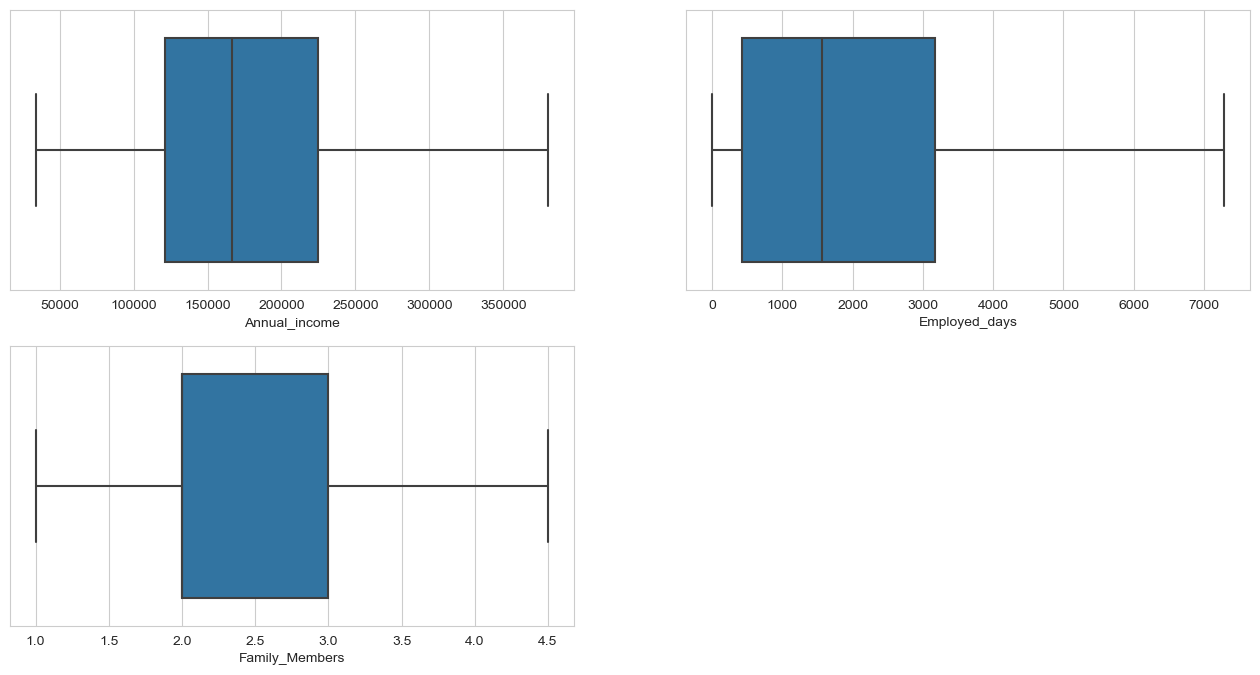

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(x= CC['Annual_income'])

plt.subplot(2,2,2)
sns.boxplot(x= CC['Employed_days'])

plt.subplot(2,2,3)
sns.boxplot(x= CC['Family_Members'])

* After IQR and capping method all the outliers has been removed.

### Feature Selection

* ID: ID is not useful for prediction, it helped us when we were merging the two datasets but after that, there is no need to keep it.
* Mobile_phone: Since everyone has a mobile phone, this feature does not inform us about anything.
* Children count: It is highly correlated with Family member count and to avoid multicollinearity, we drop it.
* Type_Occupation: Has so many missing values and the count of each category is not very different to justify the use of mode. So we drop it.

In [ ]:
CC = CC.drop(['ID','Children_count','Mobile_phone','Type_Occupation'], axis = 1)  # Dropping columns

In [ ]:
CC.head(10)

,Gender,Car_Owner,Property_Owner,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Work_Phone,Phone,Email_id,Family_Members,label
0,1.0,1.0,1.0,180000.000000,1.0,4.0,1.0,1.0,18772.000000,0.0,0.0,0.0,0.0,2.0,1
1,0.0,1.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,0.0,2.0,1
2,0.0,1.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13556.999716,586.0,1.0,1.0,0.0,2.0,1
3,0.0,1.0,0.0,315000.024923,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,0.0,2.0,1
4,0.0,1.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,0.0,2.0,1
5,0.0,1.0,0.0,315000.000000,1.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,0.0,2.0,1
6,0.0,1.0,0.0,315000.000000,0.0,4.0,1.0,1.0,13557.000000,586.0,1.0,1.0,0.0,2.0,1
7,0.0,0.0,0.0,180000.000000,1.0,2.0,1.0,1.0,22134.000000,0.0,0.0,0.0,0.0,2.0,1
8,1.0,1.0,1.0,380250.000000,0.0,2.0,1.0,1.0,18173.000000,678.0,0.0,1.0,1.0,3.0,1
9,1.0,1.0,1.0,380250.000000,1.0,2.0,1.0,1.0,18173.000000,678.0,0.0,1.0,1.0,3.0,1


In [ ]:
# Splitting Independent and dependent Variable.
X = CC.iloc[:,:-1]
y = CC.iloc[:,-1]

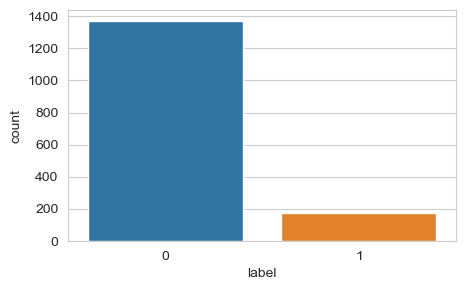

In [ ]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(CC, x='label')
plt.show()

We are oversampling with SMOTE because the minority class (Label = 1) is very rare in the data.

In [ ]:
from collections import Counter

In [ ]:
from imblearn.over_sampling import SMOTE
SMOTE  = SMOTE()
print('Original Dataset shape %s'% Counter(y))
X_res , y_res = SMOTE.fit_resample(X,y)
print('After oversample Dataset shape %s'% Counter(y_res))

Original Dataset shape Counter({0: 1373, 1: 175})
After oversample Dataset shape Counter({1: 1373, 0: 1373})


In [ ]:
df = pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)
df

,Gender,Car_Owner,Property_Owner,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age,Employed_days,Work_Phone,Phone,Email_id,Family_Members,label
0,1.000000,1.000000,1.000000,180000.000000,1.000000,4.000000,1.000000,1.000000,18772.000000,0.000000,0.000000,0.000000,0.0,2.000000,1
1,0.000000,1.000000,0.000000,315000.000000,0.000000,4.000000,1.000000,1.000000,13557.000000,586.000000,1.000000,1.000000,0.0,2.000000,1
2,0.000000,1.000000,0.000000,315000.000000,0.000000,4.000000,1.000000,1.000000,13556.999716,586.000000,1.000000,1.000000,0.0,2.000000,1
3,0.000000,1.000000,0.000000,315000.024923,0.000000,4.000000,1.000000,1.000000,13557.000000,586.000000,1.000000,1.000000,0.0,2.000000,1
4,0.000000,1.000000,0.000000,315000.000000,0.000000,4.000000,1.000000,1.000000,13557.000000,586.000000,1.000000,1.000000,0.0,2.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,0.000000,0.000000,1.000000,93553.792901,1.000000,2.789732,1.394866,1.000000,23037.651283,0.000000,0.000000,0.000000,0.0,1.605134,1
2742,0.394485,1.000000,1.000000,199837.228166,3.000000,3.211031,1.000000,1.000000,16610.125817,2773.583009,0.394485,0.394485,0.0,2.000000,1
2743,0.000000,0.267864,0.732136,135000.000000,3.000000,2.000000,3.196407,1.000000,14811.332449,775.692644,0.267864,0.732136,0.0,1.535728,1
2744,0.823680,0.000000,0.176320,131293.438747,2.823680,3.176320,1.352639,3.647361,11212.689467,1830.392605,0.823680,0.823680,0.0,2.647361,1


In [ ]:
# Splitting Independent and dependent Variable.
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
y.value_counts()

1    1373
0    1373
Name: label, dtype: int64

### Feature Scaling

**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# test_size 0.2 means 20 percent of data will be in test
# random_State = 1 means, we will get the same information everytime as we are randomly splitting the data.

In [ ]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape   # Checking the shape of Train and Test data

((2196, 14), (550, 14), (2196,), (550,))

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_train[['Annual_income','Age','Employed_days']] = ss.fit_transform(X_train[['Annual_income','Age','Employed_days']])

# Here we will use only transform method as test data set is like new dataset.
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_test[['Annual_income','Age','Employed_days']] = ss.transform(X_test[['Annual_income','Age','Employed_days']])

### Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
# Importing required libraries
from sklearn.linear_model import LogisticRegression

# Creating a Logistic regression object
log=LogisticRegression()

# Passing independant and dependant training data to the model
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)

# Confusion Matrix
cm_log=confusion_matrix(y_test, y_pred_log)
print(cm_log)
print()
print("*" *30)
print()

acc_log_train = accuracy_score(y_train,log.predict(X_train))
acc_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Print the evaluation metrics
print("Accuracy of Train:", acc_log_train)
print("Accuracy of Test:", acc_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1_log)

[[158 119]
 [103 170]]

******************************

Accuracy of Train: 0.6174863387978142
Accuracy of Test: 0.5963636363636363
Precision: 0.5882352941176471
Recall: 0.6227106227106227
F1 Score: 0.6049822064056939


### Decision Tree

In [ ]:
# Importing required library
from sklearn.tree import DecisionTreeClassifier

# Creating a Logistic regression object
decision_tree = DecisionTreeClassifier()

# Passing independant and dependant training data to the model
decision_tree.fit(X_train,y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Confusion Matrix
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print(cm_decision_tree)
print()
print("*" *30)
print()

acc_decision_tree_train = accuracy_score(y_train,decision_tree.predict(X_train))
acc_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)

# Print the evaluation metrics
print("Accuracy of Train:", acc_decision_tree_train)
print("Accuracy of Test:", acc_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("F1 Score:", f1_decision_tree)

[[249  28]
 [ 17 256]]

******************************

Accuracy of Train: 0.9968123861566485
Accuracy of Test: 0.9181818181818182
Precision: 0.9014084507042254
Recall: 0.9377289377289377
F1 Score: 0.9192100538599641


### Random forest

In [ ]:
# Importing required library
from sklearn.ensemble import RandomForestClassifier

# Creating a Logistic regression object
random_forest = RandomForestClassifier(n_estimators= 10, criterion="gini")

# Passing independant and dependant training data to the model
random_forest.fit(X_train,y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Confusion Matrix
cm_random_forest=confusion_matrix(y_test, y_pred_random_forest)
print(cm_random_forest)
print()
print("*" *30)
print()

acc_random_forest_train = accuracy_score(y_train,random_forest.predict(X_train))
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)

# Print the evaluation metrics
print("Accuracy of Train:", acc_random_forest_train)
print("Accuracy of Test:", acc_random_forest)
print("Precision:", precision_random_forest)
print("Recall:", recall_random_forest)
print("F1 Score:", f1_random_forest)

[[274   3]
 [ 14 259]]

******************************

Accuracy of Train: 0.9927140255009107
Accuracy of Test: 0.9690909090909091
Precision: 0.9885496183206107
Recall: 0.9487179487179487
F1 Score: 0.9682242990654205


### XGBoost

In [ ]:
# Importing required library
import xgboost as xgb

# Creating a Logistic regression object
xgb_classifier = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=41)

# Passing independant and dependant training data to the model
xgb_classifier.fit(X_train,y_train)
y_pred_xgb_classifier = xgb_classifier.predict(X_test)

# Confusion Matrix
cm_xgb_classifier = confusion_matrix(y_test, y_pred_xgb_classifier)
print(cm_xgb_classifier)
print()
print("*" *30)
print()

acc_xgb_classifier_train = accuracy_score(y_train,xgb_classifier.predict(X_train))
acc_xgb_classifier = accuracy_score(y_test, y_pred_xgb_classifier)
precision_xgb_classifier = precision_score(y_test, y_pred_xgb_classifier)
recall_xgb_classifier = recall_score(y_test, y_pred_xgb_classifier)
f1_xgb_classifier = f1_score(y_test, y_pred_xgb_classifier)

# Print the evaluation metrics
print("Accuracy of Train:", acc_xgb_classifier_train)
print("Accuracy of Test:", acc_xgb_classifier)
print("Precision:", precision_xgb_classifier)
print("Recall:", recall_xgb_classifier)
print("F1 Score:", f1_xgb_classifier)

[[265  12]
 [ 37 236]]

******************************

Accuracy of Train: 0.9357923497267759
Accuracy of Test: 0.9109090909090909
Precision: 0.9516129032258065
Recall: 0.8644688644688645
F1 Score: 0.9059500959692899


### Support Vector Classifier (SVC)

In [ ]:
# Importing required libraries
from sklearn.svm import SVC

# Creating a svc object
svc = SVC(kernel='linear')

# Passing independant and dependant training data to the model
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(cm_svc)
print()
print("*" *30)
print()

acc_svc_train = accuracy_score(y_train,svc.predict(X_train))
acc_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

# Print the evaluation metrics
print("Accuracy of Train:", acc_svc_train)
print("Accuracy of Test:", acc_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("F1 Score:", f1_svc)

[[145 132]
 [ 97 176]]

******************************

Accuracy of Train: 0.6138433515482696
Accuracy of Test: 0.5836363636363636
Precision: 0.5714285714285714
Recall: 0.6446886446886447
F1 Score: 0.6058519793459552


In [ ]:
#applying gridsearchcv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# defining parameter range

param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

svc_grid = SVC()
grid_svc = GridSearchCV(estimator= svc_grid, param_grid = param_grid_svc , verbose = True, cv = 10)

# fitting the model for grid search
grid_svc.fit(X_train, y_train)

# print best parameter after tuning
print(grid_svc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)


Fitting 10 folds for each of 25 candidates, totalling 250 fits
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [ ]:
# Creating a svc object
svc1 = SVC(C= 10, kernel='rbf',gamma = 1 )

# Passing independant and dependant training data to the model
svc1.fit(X_train,y_train)
y_pred_svc1 = svc1.predict(X_test)

# Confusion Matrix
cm_svc1 = confusion_matrix(y_test, y_pred_svc1)
print(cm_svc1)
print()
print("*" *30)
print()

acc_svc1_train = accuracy_score(y_train,svc1.predict(X_train))
acc_svc1 = accuracy_score(y_test, y_pred_svc1)
precision_svc1 = precision_score(y_test, y_pred_svc1)
recall_svc1 = recall_score(y_test, y_pred_svc1)
f1_svc1 = f1_score(y_test, y_pred_svc1)

# Print the evaluation metrics
print("Accuracy of Train:", acc_svc1_train)
print("Accuracy of Test:", acc_svc1)
print("Precision:", precision_svc1)
print("Recall:", recall_svc1)
print("F1 Score:", f1_svc1)

[[265  12]
 [ 11 262]]

******************************

Accuracy of Train: 0.9913479052823315
Accuracy of Test: 0.9581818181818181
Precision: 0.9562043795620438
Recall: 0.9597069597069597
F1 Score: 0.9579524680073127


### KNN

In [ ]:
# Importing required libraries
from sklearn.neighbors import KNeighborsClassifier

# Creating a svc object
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Passing independant and dependant training data to the model
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
print()
print("*" *30)
print()

acc_knn_train = accuracy_score(y_train,knn.predict(X_train))
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the evaluation metrics
print("Accuracy of Train:", acc_knn_train)
print("Accuracy of Test:", acc_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

[[204  73]
 [  8 265]]

******************************

Accuracy of Train: 0.913023679417122
Accuracy of Test: 0.8527272727272728
Precision: 0.7840236686390533
Recall: 0.9706959706959707
F1 Score: 0.8674304418985269


### Model Evaluation

We can do evaluation of all the models to choose the best one for our problem.

In [ ]:
models  = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest','XGBoost','SVC','KNN'],
    'Score_Train': [acc_log_train, acc_decision_tree_train, acc_random_forest_train,acc_xgb_classifier_train,acc_svc1_train,acc_knn_train],
    'Score_Test' :[acc_log, acc_decision_tree, acc_random_forest,acc_xgb_classifier,acc_svc1,acc_knn]

})

models

,Model,Score_Train,Score_Test
0,Logistic Regression,0.617486,0.596364
1,Decision Tree,0.996812,0.918182
2,Random Forest,0.992714,0.969091
3,XGBoost,0.935792,0.910909
4,SVC,0.991348,0.958182
5,KNN,0.913024,0.852727


### Conclusion

Using Classification report of each model, we can conclude that **Random Forest** outperforms other models for credit card approval prediction due to its several advantages.
* Its ability to handle complex relationships in the data, both linear and non-linear, leads to improved accuracy.
* The Random forest technique reduces overfitting and enhances generalization, crucial for real-world applications.
* Random Forest optimization algorithms ensure computational efficiency, making it suitable for large datasets. Moreover, its feature importance analysis provides valuable insights for decision-making.
* The ensemble approach combines weak learners into a strong predictor, boosting overall performance.
* With its accuracy, efficiency and interpretability, Random Forest stands as the preferred model for credit card approval prediction.